In [1]:
!wget https://thedaytimestories.ml/file_name.csv

--2023-10-28 18:32:27--  https://thedaytimestories.ml/file_name.csv
Resolving thedaytimestories.ml (thedaytimestories.ml)... failed: Name or service not known.
wget: unable to resolve host address ‘thedaytimestories.ml’


Checking parameters and features

In [2]:
import numpy as np

In [3]:
import pandas as pd
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("file_name.csv")

FileNotFoundError: ignored

In [ ]:
df

,Unnamed: 0,timestamp,P_mpp_original,P_pv,P_pv_setpoint,ghi,temp,dispo_pv
0,0,2021-10-31 23:45:00+04:00,0.0,-0.017111,247.16,0.0,20.000000,100
1,1,2021-11-01 00:00:00+04:00,0.0,-0.018108,247.16,0.0,20.000000,100
2,2,2021-11-01 00:15:00+04:00,0.0,-0.017899,247.16,0.0,20.000000,100
3,3,2021-11-01 00:30:00+04:00,0.0,-0.018027,247.16,0.0,19.261574,100
4,4,2021-11-01 00:45:00+04:00,0.0,-0.020167,247.16,0.0,19.977593,100
...,...,...,...,...,...,...,...,...
35036,35036,2022-10-31 22:45:00+04:00,0.0,0.021160,247.16,0.0,20.023056,100
35037,35037,2022-10-31 23:00:00+04:00,0.0,0.018419,247.16,0.0,20.292870,100
35038,35038,2022-10-31 23:15:00+04:00,0.0,0.014192,247.16,0.0,20.305278,100
35039,35039,2022-10-31 23:30:00+04:00,0.0,0.014657,247.16,0.0,20.251481,100


Removing Unnecessary Features

In [ ]:
# Read only specific columns from the CSV file
df = pd.read_csv("file_name.csv", usecols = ['P_mpp_original','ghi','temp'])

In [ ]:
df

,P_mpp_original,ghi,temp
0,0.0,0.0,20.000000
1,0.0,0.0,20.000000
2,0.0,0.0,20.000000
3,0.0,0.0,19.261574
4,0.0,0.0,19.977593
...,...,...,...
35036,0.0,0.0,20.023056
35037,0.0,0.0,20.292870
35038,0.0,0.0,20.305278
35039,0.0,0.0,20.251481


Checking for null values if yes removing them

In [ ]:
# Check for missing values in the DataFrame
df.isnull().sum().sum()

0

In [ ]:
import numpy as np

Checking corr coefficient

In [ ]:
# Calculate Pearson correlation coefficient for the columns 'P_mpp_original', 'ghi', and 'temp'
pearson = np.corrcoef([df['P_mpp_original'],df['ghi'],df['temp']])
print(pearson)

[[1.         0.97767638 0.92504859]
 [0.97767638 1.         0.92482769]
 [0.92504859 0.92482769 1.        ]]


Checking the min and max values for data normalization

In [ ]:
maxValues = df.max()
# Get the maximum values for each column in the DataFrame
print(maxValues)

P_mpp_original     258.053203
ghi               1280.586296
temp                69.902778
dtype: float64


In [ ]:
minValues = df.min()
# Get the minimum values for each column in the DataFrame
print(minValues)

P_mpp_original    0.0
ghi               0.0
temp              0.0
dtype: float64


Normalization

In [ ]:
# Normalize the columns 'P_mpp_original', 'ghi', and 'temp' by dividing them by specific values
df['P_mpp_original']= df['P_mpp_original']/1000
df['ghi']= df['ghi']/10000
df['temp']= df['temp']/100

In [ ]:
maxValues = df.max()

print(maxValues)

P_mpp_original    0.258053
ghi               0.128059
temp              0.699028
dtype: float64


In [ ]:
minValues = df.min()

print(minValues)

P_mpp_original    0.0
ghi               0.0
temp              0.0
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Printing correlation heatmap

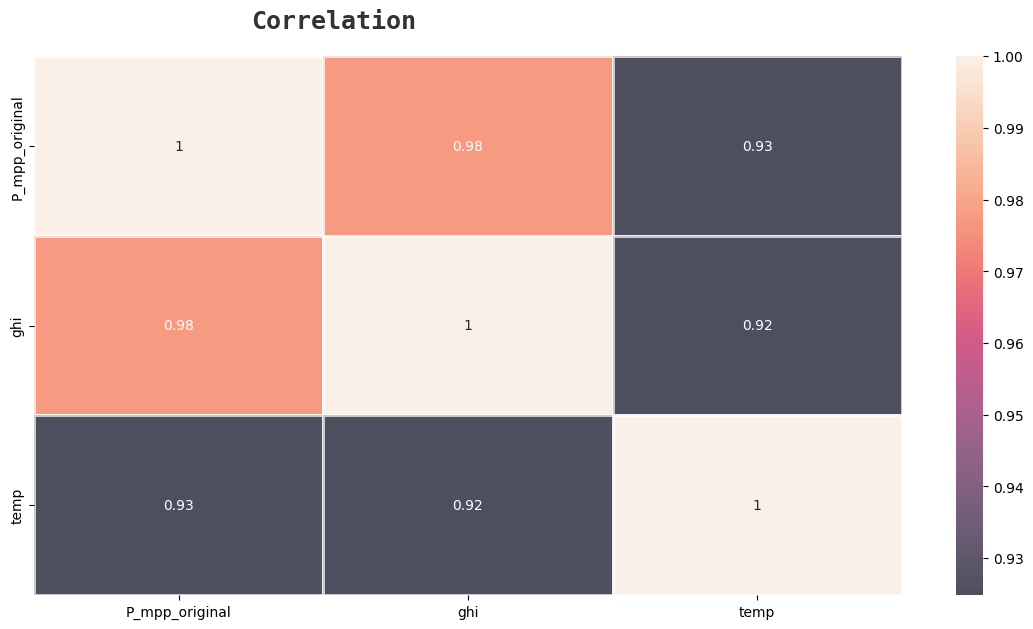

In [ ]:
# Create a list of labels for the heatmap plot
labels=['P_mpp_original','ghi','temp']
# Create a figure and axes for the heatmap plot
fig,ax=plt.subplots(1,1,figsize=(14,7))
# Create a heatmap plot with Pearson correlation coefficients as values
sns.heatmap(pearson,ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2)
# Add a title to the plot
fig.text(s='Correlation',size=18,fontweight='bold',fontname='monospace',y=0.92,x=0.28,alpha=0.8)
plt.show()

X is parameters necessary for prediction
y is the real output

In [ ]:
# Drop the column 'P_mpp_original' from the DataFrame and assign the result to X
X=df.drop('P_mpp_original', axis='columns')
# Assign the column 'P_mpp_original' to y
y=df['P_mpp_original']

In [ ]:
X.shape

(35041, 2)

In [ ]:
y.shape

(35041,)

In [ ]:
X.dtypes

ghi     float64
temp    float64
dtype: object

In [ ]:
y.dtypes

dtype('float64')

Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets using a 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

ANN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Create a sequential neural network model
model=keras.Sequential([
    keras.layers.Dense(5, input_shape=(2,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='relu'),
])
# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Training

Epoch 1/50
789/789 [==============================] - 2s 2ms/step - loss: 6.6190e-04 - val_loss: 3.7590e-04
Epoch 2/50
789/789 [==============================] - 1s 2ms/step - loss: 3.0874e-04 - val_loss: 2.9547e-04
Epoch 3/50
789/789 [==============================] - 1s 2ms/step - loss: 2.7823e-04 - val_loss: 2.7314e-04
Epoch 4/50
789/789 [==============================] - 1s 1ms/step - loss: 2.5038e-04 - val_loss: 2.5536e-04
Epoch 5/50
789/789 [==============================] - 1s 1ms/step - loss: 2.2912e-04 - val_loss: 2.3198e-04
Epoch 6/50
789/789 [==============================] - 1s 1ms/step - loss: 2.1185e-04 - val_loss: 2.1265e-04
Epoch 7/50
789/789 [==============================] - 1s 1ms/step - loss: 1.9866e-04 - val_loss: 1.9534e-04
Epoch 8/50
789/789 [==============================] - 1s 1ms/step - loss: 1.8986e-04 - val_loss: 2.1063e-04
Epoch 9/50
789/789 [==============================] - 1s 1ms/step - loss: 1.8465e-04 - val_loss: 1.8845e-04
Epoch 10/50
789/789 [=======

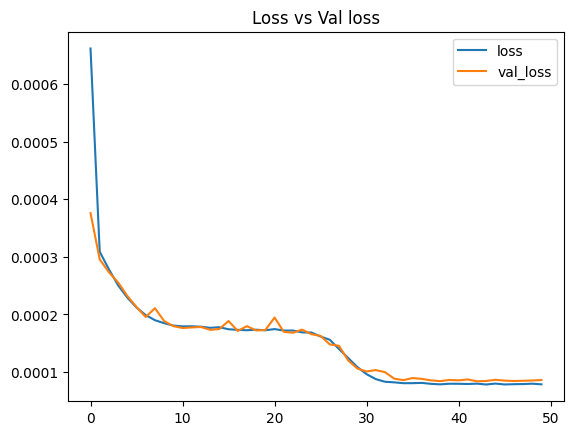

In [ ]:
# Create a list to store model training history
model_history=[]
# Train the model and store the history
history=model.fit(X_train, y_train,validation_split=0.1, epochs =50, verbose=1)
model_history.append(history)
# Plot the training loss and validation loss over epochs
#vallosscsloss
plt.title('Loss vs Val loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()


In [ ]:
# Get the weights and biases for each dense layer in the trained model

weights_dense1, biases_dense1 = model.layers[0].get_weights()
weights_dense2, biases_dense2 = model.layers[1].get_weights()
weights_dense3, biases_dense3 = model.layers[2].get_weights()
weights_dense4, biases_dense4 = model.layers[3].get_weights()

# Print the trained parameter values
print('Weights of dense layer 1:\n', weights_dense1)
print('Biases of dense layer 1:\n', biases_dense1)
print('Weights of dense layer 2:\n', weights_dense2)
print('Biases of dense layer 2:\n', biases_dense2)
print('Weights of dense layer 3:\n', weights_dense3)
print('Biases of dense layer 3:\n', biases_dense3)
print('Weights of dense layer 4:\n', weights_dense4)
print('Biases of dense layer 4:\n', biases_dense4)

Weights of dense layer 1:
 [[ 0.7542684   1.3807995  -0.62062204  0.39447653  2.4092984 ]
 [-0.2513698   0.990363   -0.46021426 -0.9179084  -0.04778934]]
Biases of dense layer 1:
 [-0.02065389 -0.09508531  0.          0.          0.01182254]
Weights of dense layer 2:
 [[-0.44411182 -0.04343778  0.05265586  0.13233155 -0.08719633]
 [ 0.09536943 -0.02528834  0.1793516   0.18756369  0.6101881 ]
 [ 0.09827632 -0.23471993  0.11013454  0.11519378 -0.27796847]
 [ 0.59065676  0.10585773 -0.24295515  0.18212819  0.5559182 ]
 [-0.645653   -0.43338203  0.9732371  -0.6547408  -0.5441825 ]]
Biases of dense layer 2:
 [-0.04424034  0.         -0.01581887 -0.06274129 -0.01364502]
Weights of dense layer 3:
 [[-0.42024124 -0.6079648  -0.06437105 -0.52151066  0.03152619]
 [-0.27093017  0.7483252  -0.5688374   0.20810783 -0.15313244]
 [ 0.10406759  0.8950451  -0.25263298 -0.8809893   0.8012206 ]
 [-0.18462044  0.65550596  0.02851212  0.60994035  0.2572827 ]
 [-0.5081568  -1.388935   -0.24361551  0.56915  

In [ ]:
import pandas as pd
df = pd.read_csv("file1.csv")

FileNotFoundError: ignored

In [ ]:
df

,timestamp,P_mpp_original,P_pv,P_pv_setpoint,ghi,temp,dispo_pv,wind_speed,Ppv_dc_mpp_th,P_mpp
0,2021-10-31 23:45:00+00:00,0.0,-0.017111,247.16,0.0,20.000000,100.0,0,0.0,0.0
1,2021-11-01 00:00:00+00:00,0.0,-0.018108,247.16,0.0,20.000000,100.0,0,0.0,0.0
2,2021-11-01 00:15:00+00:00,0.0,-0.017899,247.16,0.0,20.000000,100.0,0,0.0,0.0
3,2021-11-01 00:30:00+00:00,0.0,-0.018027,247.16,0.0,19.261574,100.0,0,0.0,0.0
4,2021-11-01 00:45:00+00:00,0.0,-0.020167,247.16,0.0,19.977593,100.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35036,2022-10-31 22:45:00+00:00,0.0,0.021160,247.13,0.0,20.023056,100.0,0,0.0,0.0
35037,2022-10-31 23:00:00+00:00,0.0,0.018419,247.13,0.0,20.292870,100.0,0,0.0,0.0
35038,2022-10-31 23:15:00+00:00,0.0,0.014192,247.13,0.0,20.305278,100.0,0,0.0,0.0
35039,2022-10-31 23:30:00+00:00,0.0,0.014657,247.13,0.0,20.251481,100.0,0,0.0,0.0


In [ ]:
df_new = pd.read_csv("file_new.csv", usecols=['P_mpp_original', 'P_mpp'])
df_new = pd.read_csv("file_new.csv", usecols=['P_mpp_original', 'P_mpp'])
# Round the values in columns 'P_mpp_original' and 'P_mpp' to four decimal places
df_new['P_mpp_original'] = df_new['P_mpp_original'].round(4)
df_new['P_mpp'] = df_new['P_mpp'].round(4)
# Filter out rows where 'P_mpp_original' is 0 or 'P_mpp' is null
df_new = df_new[(df_new['P_mpp_original'] != 0) & (df_new['P_mpp'].notnull())]

# Reset the index
df_new.reset_index(drop=True, inplace=True)
# Create a new DataFrame with only the first 1000 rows of df_new
df_new_1000 = df_new.head(1000)
# Add a new column 'X' to df_new_500 with values ranging from 1 to 1000
df_new_1000['X'] = list(range(1, 1001))
colors = ['#1f77b4', '#ff7f0e']

<ipython-input-7-3595ab7d064b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_1000['X'] = list(range(1, 1001))


Text(0, 0.5, 'Value')

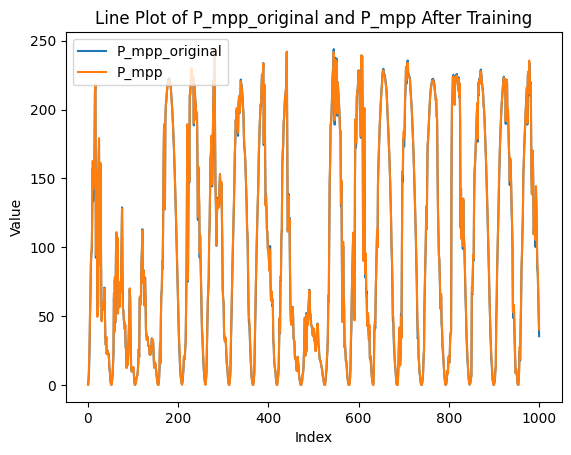

In [ ]:
# Create a line plot of 'P_mpp_original' and 'P_mpp' from df_new_500
# using colors blue ('#1f77b4') and orange ('#ff7f0e') respectively
ax = df_new_1000.plot(x='X', y='P_mpp_original', kind='line', label='P_mpp_original', color=colors[0])
df_new_1000.plot(x='X', y='P_mpp', kind='line', label='P_mpp', color=colors[1], ax=ax)
plt.title('Line Plot of P_mpp_original and P_mpp After Training')
plt.xlabel('Index')
plt.ylabel('Value')


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Calculate mean squared error (MSE) and root mean squared error (RMSE) after training
mse_after_training = np.mean((df_new['P_mpp_original'] - df_new['P_mpp'])**2)
print("MSE_AFTER_TRAINING = "+str(mse_after_training))
rmse = np.sqrt(mse_after_training)
print("RMSE_AFTER_TRAINING = "+str(rmse))
r2 = r2_score(df_new['P_mpp_original'], df_new['P_mpp'])
print("R2 score of the model= " +str(r2))
sd = np.std(df_new['P_mpp_original'] - df_new['P_mpp'])
print("Standard deviation = " +str(sd))

# Calculate Mean Error (ME)
mean_error = np.mean(df_new['P_mpp_original'] - df_new['P_mpp'])
print("Mean Error (ME): {:.2f}".format(mean_error))

MSE_AFTER_TRAINING = 4.427433552216992
RMSE_AFTER_TRAINING = 2.1041467515876815
R2 score of the model= 0.9990984868936275
Standard deviation = 1.9533298985750946
Mean Error (ME): -0.78


In [ ]:
df_old = pd.read_csv("file_old.csv", usecols=['P_mpp_original', 'P_mpp'])
df_old['P_mpp_original'] = df_old['P_mpp_original'].round(2)
df_old['P_mpp'] = df_old['P_mpp'].round(2)
df_old = df_old[(df_old['P_mpp_original'] != 0) & (df_old['P_mpp'].notnull())]

# Reset the index
df_old.reset_index(drop=True, inplace=True)
df_old_500 = df_old.head(1000)
df_old_500['X'] = list(range(1, 1001))
colors = ['#1f77b4', '#ff7f0e']

<ipython-input-6-a3f33101eeff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_500['X'] = list(range(1, 1001))


Text(0, 0.5, 'Value')

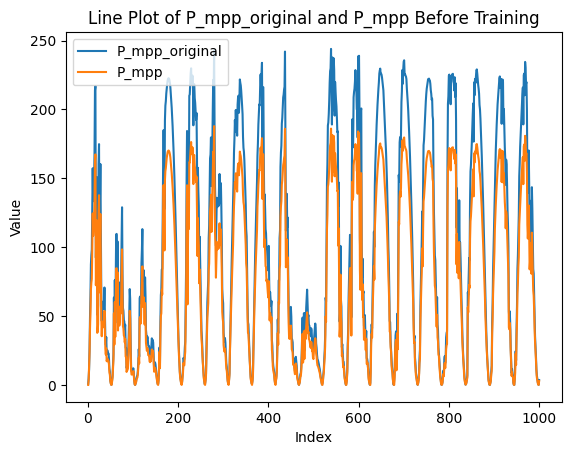

In [ ]:
ax = df_old_500.plot(x='X', y='P_mpp_original', kind='line', label='P_mpp_original', color=colors[0])
df_old_500.plot(x='X', y='P_mpp', kind='line', label='P_mpp', color=colors[1], ax=ax)
plt.title('Line Plot of P_mpp_original and P_mpp Before Training')
plt.xlabel('Index')
plt.ylabel('Value')

In [ ]:
mse_before_training = np.mean((df_old['P_mpp_original'] - df_old['P_mpp'])**2)
print("MSE_BEFORE_TRAINING = "+str(mse_before_training))
rmse = np.sqrt(mse_before_training)
print("RMSE_BEFORE_TRAINING = "+str(rmse))
r2 = r2_score(df_old['P_mpp_original'], df_old['P_mpp'])
print("R2 score of the model= " +str(r2))
sd = np.std(df_old['P_mpp_original'] - df_old['P_mpp'])
print("Standard deviation = " +str(sd))

# Calculate Mean Error (ME)
mean_error = np.mean(df_old['P_mpp_original'] - df_old['P_mpp'])
print("Mean Error (ME): {:.2f}".format(mean_error))

MSE_BEFORE_TRAINING = 638.9273351416822
RMSE_BEFORE_TRAINING = 25.27701198998177
R2 score of the model= 0.8695869915998393
Standard deviation = 16.331738628097803
Mean Error (ME): 19.29


In [ ]:
import matplotlib.pyplot as plt

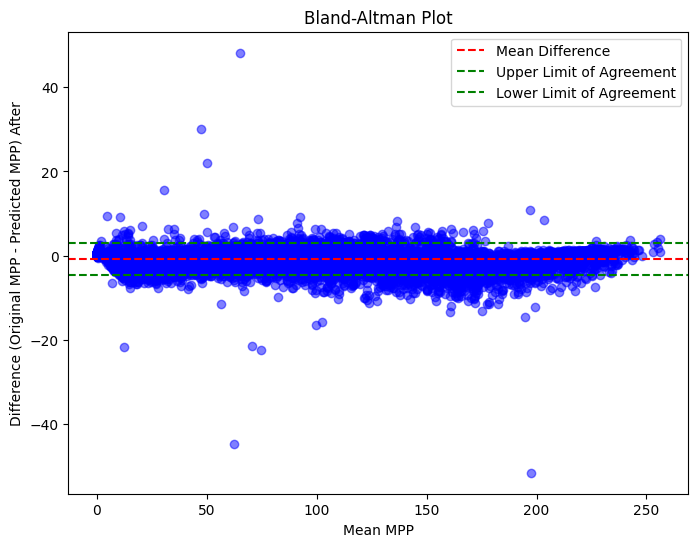

In [ ]:
original_mpp = np.array(df_new['P_mpp_original'])  # Convert to NumPy array if not already
predicted_mpp = np.array(df_new['P_mpp'])  # Convert to NumPy array if not already

# Calculate the differences and mean of original_mpp and predicted_mpp
differences = original_mpp - predicted_mpp
mean_mpp = (original_mpp + predicted_mpp) / 2

# Create Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_mpp, differences, color='blue', alpha=0.5)
plt.axhline(y=np.mean(differences), color='red', linestyle='--', label='Mean Difference')
plt.axhline(y=np.mean(differences) + 1.96 * np.std(differences), color='green', linestyle='--', label='Upper Limit of Agreement')
plt.axhline(y=np.mean(differences) - 1.96 * np.std(differences), color='green', linestyle='--', label='Lower Limit of Agreement')
plt.xlabel('Mean MPP')
plt.ylabel('Difference (Original MPP - Predicted MPP) After')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()

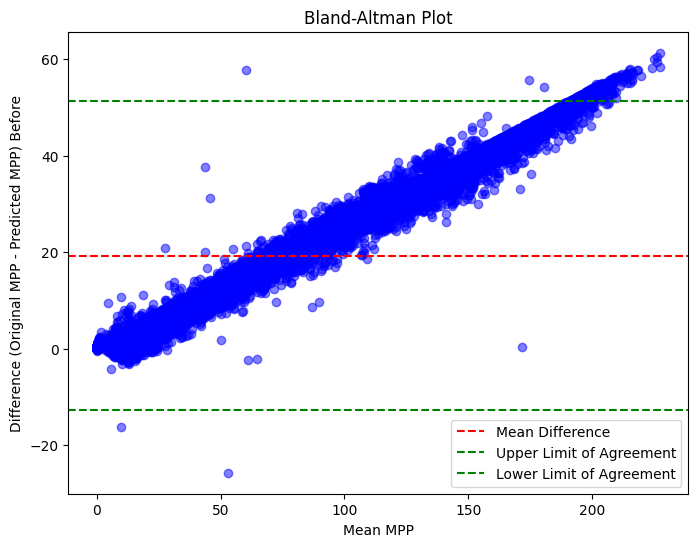

In [ ]:
original_mpp = np.array(df_old['P_mpp_original'])  # Convert to NumPy array if not already
predicted_mpp = np.array(df_old['P_mpp'])  # Convert to NumPy array if not already

# Calculate the differences and mean of original_mpp and predicted_mpp
differences = original_mpp - predicted_mpp
mean_mpp = (original_mpp + predicted_mpp) / 2

# Create Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_mpp, differences, color='blue', alpha=0.5)
plt.axhline(y=np.mean(differences), color='red', linestyle='--', label='Mean Difference')
plt.axhline(y=np.mean(differences) + 1.96 * np.std(differences), color='green', linestyle='--', label='Upper Limit of Agreement')
plt.axhline(y=np.mean(differences) - 1.96 * np.std(differences), color='green', linestyle='--', label='Lower Limit of Agreement')
plt.xlabel('Mean MPP')
plt.ylabel('Difference (Original MPP - Predicted MPP) Before')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()

In [ ]:
df_old = pd.read_csv("file_old.csv", usecols=['timestamp','temp','ghi','P_mpp_original','P_mpp'])
df_new = pd.read_csv("file_new.csv")


In [ ]:
df_old

,timestamp,P_mpp_original,ghi,temp,P_mpp
0,2021-10-31 23:45:00+00:00,0.0,0.0,20.000000,0.0
1,2021-11-01 00:00:00+00:00,0.0,0.0,20.000000,0.0
2,2021-11-01 00:15:00+00:00,0.0,0.0,20.000000,0.0
3,2021-11-01 00:30:00+00:00,0.0,0.0,19.261574,0.0
4,2021-11-01 00:45:00+00:00,0.0,0.0,19.977593,0.0
...,...,...,...,...,...
35036,2022-10-31 22:45:00+00:00,0.0,0.0,20.023056,0.0
35037,2022-10-31 23:00:00+00:00,0.0,0.0,20.292870,0.0
35038,2022-10-31 23:15:00+00:00,0.0,0.0,20.305278,0.0
35039,2022-10-31 23:30:00+00:00,0.0,0.0,20.251481,0.0


In [ ]:
df_old["P_mpp_measured"] = df_new["P_mpp_original"]
df_old['P_mpp_After_Training'] = df_new["P_mpp"]
df_old["P_mpp_Before_Training"] = df_old["P_mpp"]
df_old.drop('P_mpp', axis=1, inplace=True)
df_old.drop('P_mpp_original', axis=1, inplace=True)
df_old.drop('timestamp', axis=1, inplace=True)

In [ ]:
df_old = df_old[(df_old['P_mpp_measured'] != 0) & (df_old['P_mpp_Before_Training'].notnull()) & (df_old['P_mpp_After_Training'].notnull())]

# Reset the index
df_old.reset_index(drop=True, inplace=True)

In [ ]:
df_old

,timestamp,ghi,temp,P_mpp_measured,P_mpp_After_Training,P_mpp_Before_Training
0,2021-11-01 05:30:00+00:00,4.645370,19.000000,0.793490,0.005930,0.000825
1,2021-11-01 05:45:00+00:00,20.555370,19.717685,4.828358,4.718963,3.593240
2,2021-11-01 06:00:00+00:00,43.140648,21.245000,11.278208,16.261576,13.054182
3,2021-11-01 06:15:00+00:00,87.428981,23.160926,26.264019,30.098135,23.904297
4,2021-11-01 06:30:00+00:00,155.082222,27.855648,48.859759,51.986367,40.996592
...,...,...,...,...,...,...
17930,2022-10-31 17:30:00+00:00,64.455185,27.448889,12.802326,13.317314,10.142458
17931,2022-10-31 17:45:00+00:00,39.797778,25.567870,8.160693,8.333008,6.343349
17932,2022-10-31 18:00:00+00:00,19.422037,24.226574,3.990201,4.006425,3.048038
17933,2022-10-31 18:15:00+00:00,5.276852,23.062130,0.954762,1.022938,0.777697


In [ ]:
df_old["Error_Before_Training"] = abs(df_old['P_mpp_measured'] - df_old['P_mpp_Before_Training'])
df_old["Error_After_Training"] = abs(df_old['P_mpp_measured'] - df_old['P_mpp_After_Training'])

df_old

,timestamp,ghi,temp,P_mpp_measured,P_mpp_After_Training,P_mpp_Before_Training,Error_Before_Training,Error_After_Training
0,2021-11-01 05:30:00+00:00,4.645370,19.000000,0.793490,0.005930,0.000825,0.792665,0.787559
1,2021-11-01 05:45:00+00:00,20.555370,19.717685,4.828358,4.718963,3.593240,1.235118,0.109395
2,2021-11-01 06:00:00+00:00,43.140648,21.245000,11.278208,16.261576,13.054182,1.775974,4.983369
3,2021-11-01 06:15:00+00:00,87.428981,23.160926,26.264019,30.098135,23.904297,2.359722,3.834116
4,2021-11-01 06:30:00+00:00,155.082222,27.855648,48.859759,51.986367,40.996592,7.863167,3.126608
...,...,...,...,...,...,...,...,...
17930,2022-10-31 17:30:00+00:00,64.455185,27.448889,12.802326,13.317314,10.142458,2.659867,0.514988
17931,2022-10-31 17:45:00+00:00,39.797778,25.567870,8.160693,8.333008,6.343349,1.817344,0.172316
17932,2022-10-31 18:00:00+00:00,19.422037,24.226574,3.990201,4.006425,3.048038,0.942163,0.016224
17933,2022-10-31 18:15:00+00:00,5.276852,23.062130,0.954762,1.022938,0.777697,0.177065,0.068176


In [ ]:
df_old['Relative_Error_After'] = ((df_old['P_mpp_After_Training'] - df_old['P_mpp_original']) / df_old['P_mpp_original']) * 100

<ipython-input-28-5e138f11001b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['Relative_Error_After'] = ((df_old['P_mpp_After_Training'] - df_old['P_mpp_original']) / df_old['P_mpp_original']) * 100


In [ ]:
df_old


,timestamp,ghi,temp,P_mpp_measured,P_mpp_After_Training,P_mpp_Before_Training,Error_Before_Training,Error_After_Training
0,2021-11-01 05:30:00+00:00,4.645370,19.000000,0.793490,0.005930,0.000825,0.792665,0.787559
1,2021-11-01 05:45:00+00:00,20.555370,19.717685,4.828358,4.718963,3.593240,1.235118,0.109395
2,2021-11-01 06:00:00+00:00,43.140648,21.245000,11.278208,16.261576,13.054182,1.775974,4.983369
3,2021-11-01 06:15:00+00:00,87.428981,23.160926,26.264019,30.098135,23.904297,2.359722,3.834116
4,2021-11-01 06:30:00+00:00,155.082222,27.855648,48.859759,51.986367,40.996592,7.863167,3.126608
...,...,...,...,...,...,...,...,...
17930,2022-10-31 17:30:00+00:00,64.455185,27.448889,12.802326,13.317314,10.142458,2.659867,0.514988
17931,2022-10-31 17:45:00+00:00,39.797778,25.567870,8.160693,8.333008,6.343349,1.817344,0.172316
17932,2022-10-31 18:00:00+00:00,19.422037,24.226574,3.990201,4.006425,3.048038,0.942163,0.016224
17933,2022-10-31 18:15:00+00:00,5.276852,23.062130,0.954762,1.022938,0.777697,0.177065,0.068176


In [ ]:
from google.colab import files

# Save DataFrame to a CSV file
df_old.to_csv('output.csv', index=False)  # Replace 'output.csv' with the desired output file name

# Download CSV file
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_old.drop('timestamp', axis=1, inplace=True)

In [ ]:
random_sample = df_old.sample(n=100)

In [ ]:
random_sample

,ghi,temp,P_mpp_measured,P_mpp_After_Training,P_mpp_Before_Training,Error_Before_Training,Error_After_Training
9854,758.204814,25.000000,170.170404,170.823416,130.143915,40.026489,0.653012
3701,1052.978243,25.000000,226.581513,225.512129,173.106727,53.474785,1.069384
6084,690.815835,25.000000,135.330777,136.376119,104.345966,30.984811,1.045342
11521,354.381944,32.752593,79.011532,78.625780,60.167124,18.844407,0.385751
1615,5.894815,24.759259,1.126207,1.137624,0.864865,0.261341,0.011417
...,...,...,...,...,...,...,...
17405,165.713426,27.963704,32.668550,34.152855,26.148563,6.519987,1.484306
14112,1.560000,16.388889,0.210108,0.001300,0.000180,0.209929,0.208809
11879,709.615834,25.000000,173.874549,175.905595,134.038010,39.836539,2.031046
16423,295.993426,30.342963,58.355546,60.648767,46.445605,11.909941,2.293221


In [ ]:
random_sample.to_csv('output_final.csv', index=False)  # Replace 'output.csv' with the desired output file name

# Download CSV file
files.download('output_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>